In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from joblib import load as jload
import time
import random
import os

In [ ]:
PATH2PROJECT = "/content/drive/MyDrive/Projects/EyeTracker/"
trained_models_dir = PATH2PROJECT + "models/eye_tracking/trained/"
scaler_dir = PATH2PROJECT + "models/eye_tracking/trained/scalers.bin"
MODEL_FOL = "model2"
SUBJECT_NUM = 1
R_TRAIN = 0.85
CHOSEN_INPUTS = [0, 1, 2, 6, 7, 8, 9]
N_EPOCHS = 200
PATIENCE = 25
TRAINABLE_LAYERS = 2
N_SMP_SLC = 30
N_SMP_PNT = 400

In [ ]:
subjects_dir = PATH2PROJECT + "subjects/"

with open(subjects_dir + f"{SUBJECT_NUM}/eye_tracking/x1.pickle", "rb") as f:
    x1_load = pickle.load(f)
with open(subjects_dir + f"{SUBJECT_NUM}/eye_tracking/x2.pickle", "rb") as f:
    x2_load = pickle.load(f)
with open(subjects_dir + f"{SUBJECT_NUM}/eye_tracking/y.pickle", "rb") as f:
    y_load = pickle.load(f)

n_smp, frame_height, frame_width = x1_load.shape[:-1]
print(n_smp)

14000


In [ ]:
x2_chs_inp = x2_load[:, CHOSEN_INPUTS]

In [ ]:
scalers = jload(scaler_dir)
x1_scaler, x2_scaler, _ = scalers

x1 = x1_load / x1_scaler
x2 = x2_scaler.transform(x2_chs_inp)

y_scalers = y_load.max(0)
y = y_load / y_scalers

In [ ]:
# 14000 dataset, 9 point
# points3x3 = np.array([1, 3, 5, 10, 17, 18, 20, 26, 31])
# n_smp_slc = 400
# n_smp_pnt = 400

# n_point = n_smp_sbj // n_smp_pnt
# x1_seen = []
# x2_seen = []
# y_seen = []
# x1_unseen = []
# x2_unseen = []
# y_unseen = []

# for i in range(n_point):
#     if np.sum(i == points3x3) == 1:
#         for j in range(n_smp_slc):
#             x1_seen.append(x1_sbj[i * n_smp_pnt + j])
#             x2_seen.append(x2_sbj[i * n_smp_pnt + j])
#             y_seen.append(y_sbj[i * n_smp_pnt + j])
#     else:
#         for j in range(n_smp_pnt):
#             x1_unseen.append(x1_sbj[i * n_smp_pnt + j])
#             x2_unseen.append(x2_sbj[i * n_smp_pnt + j])
#             y_unseen.append(y_sbj[i * n_smp_pnt + j])

# x1_seen = np.array(x1_seen)
# x2_seen = np.array(x2_seen)
# y_seen = np.array(y_seen)
# x1_unseen = np.array(x1_unseen)
# x2_unseen = np.array(x2_unseen)
# y_unseen = np.array(y_unseen)

# n_seen = x1_seen.shape[0]
# n_unseen = x1_unseen.shape[0]
# print(n_seen)
# print(n_unseen)

In [ ]:
# 14000 dataset, 35 point
# n_point = n_smp // N_SMP_PNT
# x1_train = []
# x2_train = []
# y_train = []
# x1_test = []
# x2_test = []
# y_test = []

# for i in range(n_point):
#     for j in range(N_SMP_PNT):
#         if j < N_SMP_SLC:
#             x1_train.append(x1[i * N_SMP_PNT + j])
#             x2_train.append(x2[i * N_SMP_PNT + j])
#             y_train.append(y[i * N_SMP_PNT + j])
#         else:
#             x1_test.append(x1[i * N_SMP_PNT + j])
#             x2_test.append(x2[i * N_SMP_PNT + j])
#             y_test.append(y[i * N_SMP_PNT + j])

# x1_train = np.array(x1_train)
# x2_train = np.array(x2_train)
# y_train = np.array(y_train)
# x1_test = np.array(x1_test)
# x2_test = np.array(x2_test)
# y_test = np.array(y_test)

# n_train = x1_train.shape[0]
# n_test = x1_test.shape[0]
# print(n_train)
# print(n_test)

1050
12950


[ 0.55121882  0.44088888  0.44734527 -1.15685876 -0.97355251 -0.83933475
  0.05087425]
[1.   0.25]


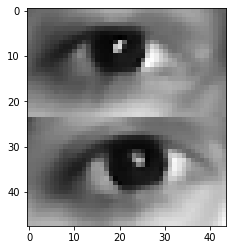

In [ ]:
SAMPLE_NUMBER = 120
print(x2_train[SAMPLE_NUMBER])
print(y_train[SAMPLE_NUMBER])
plt.imshow(x1_train[SAMPLE_NUMBER].
           reshape((frame_height, frame_width)), cmap="gray")
plt.show()

In [ ]:
y1_train, y2_train = y_train[:, 0], y_train[:, 1]
y1_test, y2_test = y_test[:, 0], y_test[:, 1]

In [ ]:
(
  x1_train_shf,
  x2_train_shf,
  y1_train_shf,
  y2_train_shf
) = shuffle(
    x1_train,
    x2_train,
    y1_train,
    y2_train
    )

(
    x1_test_shf,
    x2_test_shf,
    y1_test_shf,
    y2_test_shf
) = shuffle(
    x1_test,
    x2_test,
    y1_test,
    y2_test
)

print(x1_train_shf.shape, x2_train_shf.shape,
      y1_train_shf.shape, y2_train_shf.shape,
      x1_test_shf.shape, x2_test_shf.shape,
      y1_test_shf.shape, y2_test_shf.shape)

(1050, 48, 44, 1) (1050, 7) (1050,) (1050,) (12950, 48, 44, 1) (12950, 7) (12950,) (12950,)


In [ ]:
x_train_list = [x1_train_shf, x2_train_shf]
y_train_list = [y1_train_shf, y2_train_shf]

x_test_list = [x1_test_shf, x2_test_shf]
y_test_list = [y1_test_shf, y2_test_shf]

In [ ]:
cb = EarlyStopping(patience=PATIENCE, verbose=1, restore_best_weights=True)

In [ ]:
model = load_model(trained_models_dir + MODEL_FOL)
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 48, 44, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 48, 44, 16)   416         input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 24, 22, 16)   0           conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 24, 22, 32)   12832       max_pooling2d_12[0][0]           
____________________________________________________________________________________________

In [ ]:
for layer in model.layers[:-TRAINABLE_LAYERS]:
    layer.trainable = False
for layer in model.layers:
    print(layer, layer.trainable)

print(model.summary())

<keras.engine.input_layer.InputLayer object at 0x7f20d3aa7cd0> False
<keras.layers.convolutional.Conv2D object at 0x7f20d3ae67d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f20d3ac0750> False
<keras.layers.convolutional.Conv2D object at 0x7f20d3ac1510> False
<keras.layers.pooling.MaxPooling2D object at 0x7f20d3ac66d0> False
<keras.layers.convolutional.Conv2D object at 0x7f20d3ac74d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f20d3acd690> False
<keras.layers.core.Flatten object at 0x7f20d3acf610> False
<keras.layers.core.Dense object at 0x7f20d3ad30d0> False
<keras.engine.input_layer.InputLayer object at 0x7f20d3ad3a90> False
<keras.layers.merge.Concatenate object at 0x7f20d3ad9490> False
<keras.layers.core.Dense object at 0x7f20d3ad9fd0> False
<keras.layers.core.Dense object at 0x7f20d3adbf50> False
<keras.layers.core.Dense object at 0x7f20d3a5eed0> False
<keras.layers.core.Dense object at 0x7f20d3a64e90> False
<keras.layers.core.Dense object at 0x7f20d3a69e50> F

In [ ]:
results = model.fit(x_train_list,
                    y_train_list,
                    validation_data=(x_test_list, y_test_list),
                    epochs=N_EPOCHS,
                    callbacks=cb)

Epoch 1/200
33/33 [==============================] - 16s 455ms/step - loss: 0.3271 - dense_53_loss: 0.1276 - dense_54_loss: 0.1995 - val_loss: 0.2057 - val_dense_53_loss: 0.0557 - val_dense_54_loss: 0.1500
Epoch 2/200
33/33 [==============================] - 14s 439ms/step - loss: 0.3100 - dense_53_loss: 0.1179 - dense_54_loss: 0.1922 - val_loss: 0.2153 - val_dense_53_loss: 0.0580 - val_dense_54_loss: 0.1574
Epoch 3/200
33/33 [==============================] - 14s 441ms/step - loss: 0.2831 - dense_53_loss: 0.1151 - dense_54_loss: 0.1680 - val_loss: 0.1907 - val_dense_53_loss: 0.0537 - val_dense_54_loss: 0.1370
Epoch 4/200
33/33 [==============================] - 14s 440ms/step - loss: 0.2620 - dense_53_loss: 0.1080 - dense_54_loss: 0.1540 - val_loss: 0.1744 - val_dense_53_loss: 0.0501 - val_dense_54_loss: 0.1243
Epoch 5/200
33/33 [==============================] - 14s 437ms/step - loss: 0.2495 - dense_53_loss: 0.1018 - dense_54_loss: 0.1477 - val_loss: 0.1785 - val_dense_53_loss: 0.050

In [ ]:
yhat_train_list = model.predict(x_train_list)
yhat_test_list = model.predict(x_test_list)
    
y_train_new = np.concatenate((np.expand_dims(y_train_list[0], 1),
                                np.expand_dims(y_train_list[1], 1)), 1)
yhat_train = np.concatenate((yhat_train_list[0], yhat_train_list[1]), 1)
y_test_new = np.concatenate((np.expand_dims(y_test_list[0], 1),
                                np.expand_dims(y_test_list[1], 1)), 1)
yhat_test = np.concatenate((yhat_test_list[0], yhat_test_list[1]), 1)

In [ ]:
train_loss = np.abs(y_train_new - yhat_train).sum(0) / n_train
test_loss = np.abs(y_test_new - yhat_test).sum(0) / n_test

print(train_loss, test_loss)

[0.07835662 0.09979976] [0.04930057 0.11272564]


Train
[3594    0]
[3564  475]
Test
[1797 1422]
[1805 1423]


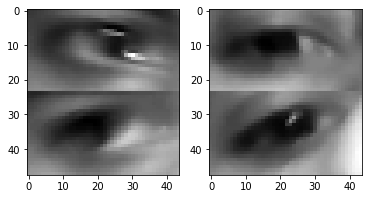

In [ ]:
NUM = 36
print("Train")
sample_train = (y_train_new[NUM] * y_scalers).astype(np.uint32)
yhat_train[NUM][yhat_train[NUM] < 0] = 0
sample_train_hat = (yhat_train[NUM] * y_scalers).astype(np.uint32)
print(sample_train)
print(sample_train_hat)

print("Test")
sample_test = (y_test_new[NUM] * y_scalers).astype(np.uint32)
yhat_test[NUM][yhat_test[NUM] < 0] = 0
sample_test_hat = (yhat_test[NUM] * y_scalers).astype(np.uint32)
print(sample_test)
print(sample_test_hat)

_, ax = plt.subplots(1,2)
ax[0].imshow((x_train_list[0][NUM] * 255).astype(np.uint8).
           reshape((frame_height, frame_width)), cmap="gray")
ax[1].imshow((x_test_list[0][NUM] * 255).astype(np.uint8).
           reshape((frame_height, frame_width)), cmap="gray")

In [ ]:
# model.save(PATH2PROJECT + f"subjects/{SUBJECT_NUM}/eye_tracking/model")